In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score


In [41]:
df = pd.read_csv('Parkinsson disease.csv')

In [42]:
x = df.drop(['name', 'status'], axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [43]:
print("Original dataset %s" % y.value_counts())

smote = SMOTE(random_state=42)
x,y = smote.fit_resample(x, y)

print("Resampled dataset %s" % y.value_counts())

Original dataset status
1    147
0     48
Name: count, dtype: int64
Resampled dataset status
1    147
0    147
Name: count, dtype: int64


In [44]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

Results for Logistic Regression
Accuracy: 0.9230769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



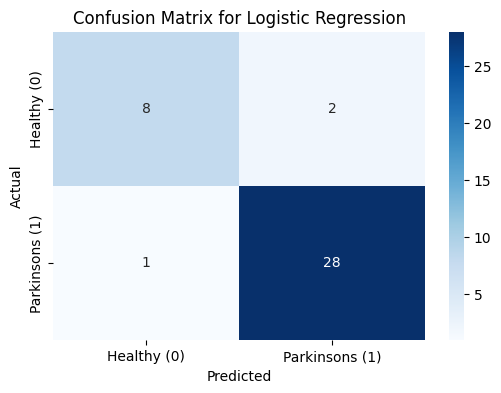

Results for Support Vector Machine
Accuracy: 0.9230769230769231

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39



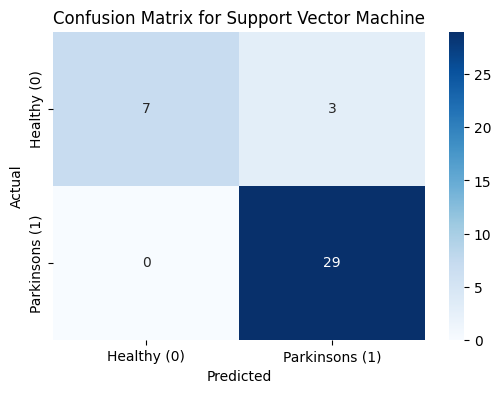

Results for Random Forest
Accuracy: 0.9230769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



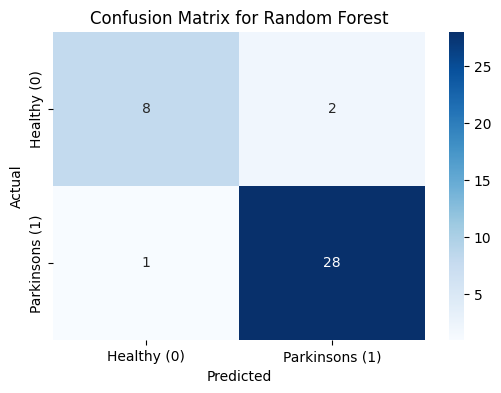

Results for XGBoost
Accuracy: 0.9230769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



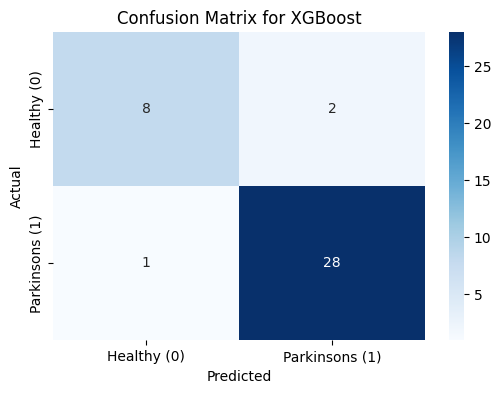

In [45]:
results_list = []
for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    
    results_list.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
    print(f"Results for {name}")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
   
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy (0)', 'Parkinsons (1)'], yticklabels=['Healthy (0)', 'Parkinsons (1)'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [46]:
results_df = pd.DataFrame(results_list)
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
results_df_sorted

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.923077,0.921937,0.923077,0.921705
1,Support Vector Machine,0.923077,0.930288,0.923077,0.918181
2,Random Forest,0.923077,0.921937,0.923077,0.921705
3,XGBoost,0.923077,0.921937,0.923077,0.921705


In [47]:

from sklearn.model_selection import  GridSearchCV
from imblearn.pipeline import Pipeline




x = df.drop(['name', 'status'], axis=1)
y = df['status']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])


param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.05],
    'classifier__subsample': [0.7, 1.0]
}


grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=1)



grid_search.fit(X_train, y_train)
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Parameters Found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.7}
Best Cross-Validation Accuracy: 0.9171
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



In [ ]:

from xgboost import XGBClassifier


best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(eval_metric='logloss'))
])


best_model.fit(X_train, y_train)
model_step = best_model.named_steps['classifier']
importances = model_step.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})


new_x = feature_importance_df.sort_values(by='importance', ascending=False).head(10)


In [55]:
new_x

,feature,importance
21,PPE,0.216699
18,spread1,0.196355
14,NHR,0.096487
3,MDVP:Jitter(%),0.056666
2,MDVP:Flo(Hz),0.055258
9,MDVP:Shimmer(dB),0.053470
8,MDVP:Shimmer,0.042100
0,MDVP:Fo(Hz),0.040522
12,MDVP:APQ,0.037246
11,Shimmer:APQ5,0.032513


In [60]:
feature_list = ['PPE','spread1','NHR','MDVP:Jitter(%)','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','MDVP:Shimmer','MDVP:Fo(Hz)','MDVP:APQ','Shimmer:APQ5']

x = df[feature_list]
y = df['status']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


grid_search.fit(X_train, y_train)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Cross-Validation Accuracy: 0.8913
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



In [ ]:
columns_to_keep = ['name'] + feature_list + ['status']


cleaned_df = df[columns_to_keep]

output_filename = 'cleaned_parkinsons_data.csv'
cleaned_df.to_csv(output_filename, index=False)




Success! ✅
The new cleaned file has been saved as 'cleaned_parkinsons_data.csv'


In [61]:
import pickle
with open('best_model.pkl','wb') as fp:
  pickle.dump(best_model,fp)

with open('features_list.pkl','wb') as fp:
  pickle.dump(feature_list,fp)